<a href="https://colab.research.google.com/github/Jachmi03/lecture/blob/main/PUM_entropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_iris()

1. Zwizaualizuj dane
2. Sprawdź, który z podziałów jest lepszy w przypadku miary entropii:
a) petal width (cm)na poziomie: 1.5
b) petal width (cm)na poziomie: 0.38
Podaj zysk informacyjny na każdym z podziałów
3. Zaimplementuj drzewo decyzyjne i las losowy (złożony z 15 drzew); przetestuj na 30%
zbiorze testowym
sklearn.ensemble.RandomForestClassifier
sklearn.tree.DecisionTreeClassifier

In [27]:
import pandas as pd

df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


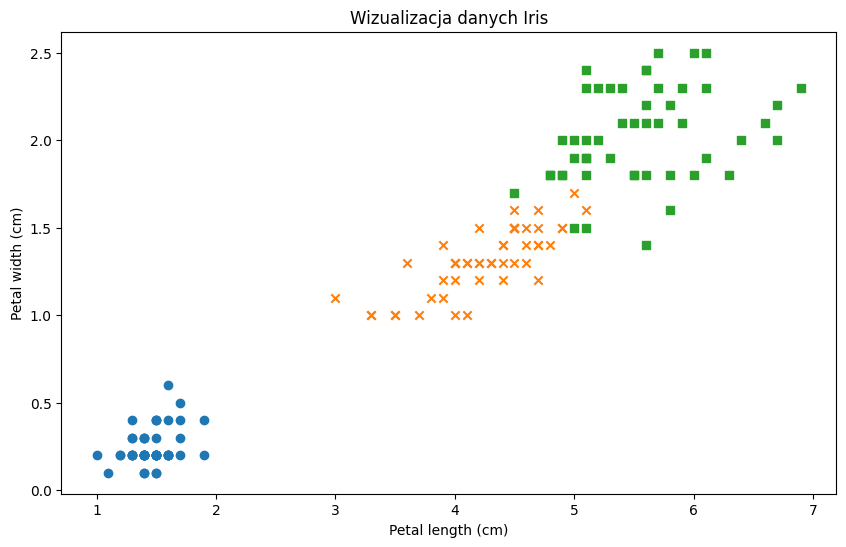

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data.data
y = data.target

# 1. Wizualizacja danych
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 2], X[y == 0, 3], marker='o')
plt.scatter(X[y == 1, 2], X[y == 1, 3], marker='x')
plt.scatter(X[y == 2, 2], X[y == 2, 3], marker='s')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Wizualizacja danych Iris')
plt.show()

In [26]:
# 2. Porównanie podziałów i zysk informacyjny
def entropy(labels):
  _, counts = np.unique(labels, return_counts=True)
  probabilities = counts / len(labels)
  return -np.sum(probabilities * np.log2(probabilities))

def information_gain(labels_parent, labels_left, labels_right):
    p = len(labels_left) / len(labels_parent)
    return entropy(labels_parent) - p * entropy(labels_left) - (1 - p) * entropy(labels_right)

petal_width_threshold_a = 1.5
petal_width_threshold_b = 0.38

# Podział a
left_indices_a = X[:, 3] < petal_width_threshold_a
right_indices_a = X[:, 3] >= petal_width_threshold_a
gain_a = information_gain(y, y[left_indices_a], y[right_indices_a])

# Podział b
left_indices_b = X[:, 3] < petal_width_threshold_b
right_indices_b = X[:, 3] >= petal_width_threshold_b
gain_b = information_gain(y, y[left_indices_b], y[right_indices_b])

print(f"Zysk informacyjny dla podziału a (petal width = 1.5): {gain_a:.4f}")
print(f"Zysk informacyjny dla podziału b (petal width = 0.38): {gain_b:.4f}")

Zysk informacyjny dla podziału a (petal width = 1.5): 0.6435
Zysk informacyjny dla podziału b (petal width = 0.38): 0.6195


In [28]:
# 3. Drzewo decyzyjne i las losowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Drzewo decyzyjne
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Dokładność drzewa decyzyjnego: {dt_accuracy:.4f}")

# Las losowy
rf_classifier = RandomForestClassifier(n_estimators=15, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Dokładność lasu losowego: {rf_accuracy:.4f}")


Dokładność drzewa decyzyjnego: 1.0000
Dokładność lasu losowego: 1.0000
